In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Loading Image and Casting into RGB

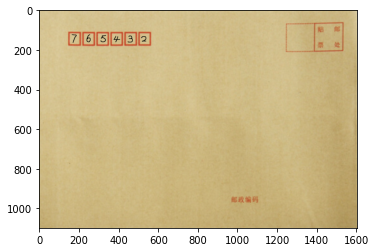

In [2]:
im = cv2.imread('b.png')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)

# Focusing onto Left-upper part

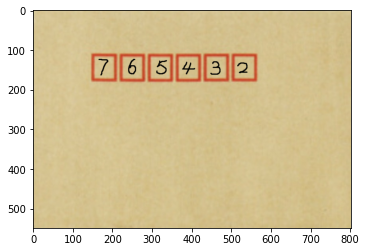

In [3]:
im = im[:im.shape[0] // 2, :im.shape[1] // 2, :]
plt.imshow(im)

# Casting into Gray

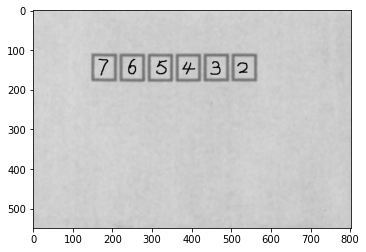

In [4]:
im_gray = im.mean(axis=2) / 255.0
plt.imshow(im_gray, cmap='gray')

# Casting into Binary Image with Threshold

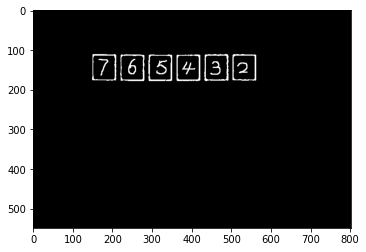

In [5]:
im_binary = cv2.threshold(im_gray, 0.45, 1, cv2.THRESH_BINARY)[1]
im_binary = 1 - im_binary
plt.imshow(im_binary, cmap='gray')

# Left-upper Edge Detecting

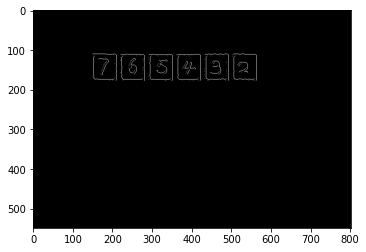

In [6]:
im_binary_right = np.roll(im_binary, shift=(1,), axis=(1,))
im_binary_up  = np.roll(im_binary, shift=(-1,), axis=(0,))

im_binary_right = np.logical_or(im_binary, im_binary_right)
im_binary_up = np.logical_or(im_binary, im_binary_up)

im_binary_right = np.logical_xor(im_binary, im_binary_right)
im_binary_up = np.logical_xor(im_binary, im_binary_up)

im_pro = np.logical_or(im_binary_right, im_binary_up)

plt.imshow(im_pro, cmap='gray')

# Horizontal Pixel Sum

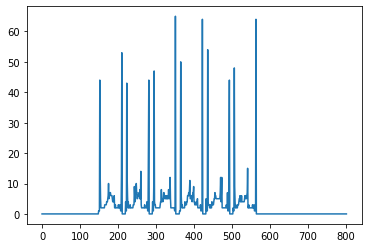

In [7]:
plt.plot(list(range(len(im_pro.sum(axis=0)))), im_pro.sum(axis=0))

# Counting 12 Greatest locations

In [8]:
idx = np.sort(im_pro.sum(axis=0).argsort()[-12:])

# Seting Horizontal Parting Lines

In [9]:
im_gray[:,idx] = 0

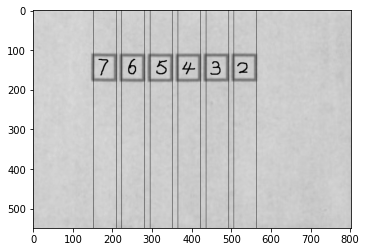

In [10]:
plt.imshow(im_gray, cmap='gray')

# Vertical Pixel Sum

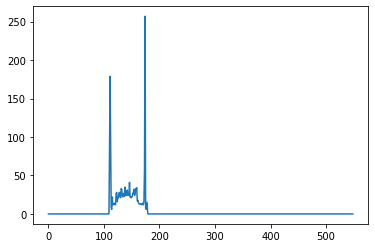

In [11]:
plt.plot(list(range(len(im_pro.sum(axis=1)))), im_pro.sum(axis=1))

# Counting 2 Greatest locations

In [12]:
idx = np.sort(im_pro.sum(axis=1).argsort()[-2:])

# Setting Vertical Parting Lines

In [13]:
im_gray[idx,:] = 0

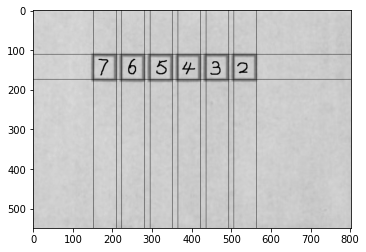

In [14]:
plt.imshow(im_gray, cmap='gray')